# DJI Zenmuse L2 (Risley Prism Scanner) Demo
Notebook: Thomas Isensee & Hannah Weiser, 2026

This demo notebook uses the DJI Zenmuse L2 laser scanner, which is based on a risley beam deflector with three prisms. It has two scan modes, one that results in a repetitive scan pattern and one that results in a non-repetitive scan pattern.

In [1]:
import helios
import matplotlib.pyplot as plt

## Scene

We use a simple scene, consisting of a cubix box (`box100.obj`) of 100 x 100 x 100 units, which is centered at the origin O(0,0,0). We like to use this scene for debugging purposes, because no shots get lost when scanning from within the box and the planar surfaces allow to assess the scan pattern.

In [2]:
box = helios.ScenePart.from_obj("../data/sceneparts/basic/box/box100.obj")
scene = helios.StaticScene(scene_parts=[box])

## Survey 1: Repetitive scan pattern

Here, we simulate a simple linear path survey with a single leg, which moves at 50 m/s for 5 m along the x-axis.

In [4]:
scanner = helios.scanner_from_name("dji_zenmuse_l2_repetitive")
platform = helios.platform_from_name("sr22")

survey = helios.Survey(scanner=scanner, platform=platform, scene=scene)

survey.add_leg(x=0.0, y=-15.0, z=0.0, speed_m_s=50)
survey.add_leg(x=5.0, y=-15.0, z=0.0, speed_m_s=50)

We use the DJI Zenmuse L2, defined in `python/helios/data/scanners_als.xml`, with the repetitive scan pattern (`dji-zenmuse-l2-repetitive`). For this deflector type, the scan pattern is controlled by the rotation speeds (`rotorFreq1_Hz` and `rotorFreq2_Hz`, `rotorFreq3_Hz`) of three rotating risley prisms. This design is described in detail in [Qin et al. (2024)](https://doi.org/10.1016/j.optcom.2024.130915).

TODO: Insert figure of scan pattern here, either from publication of from Jannik.

## Executing the survey

In [5]:
points, trajectories = survey.run(verbosity=helios.LogVerbosity.VERBOSE, format=helios.OutputFormat.NPY)

## Visualizing the results 
Now we can display the point cloud.

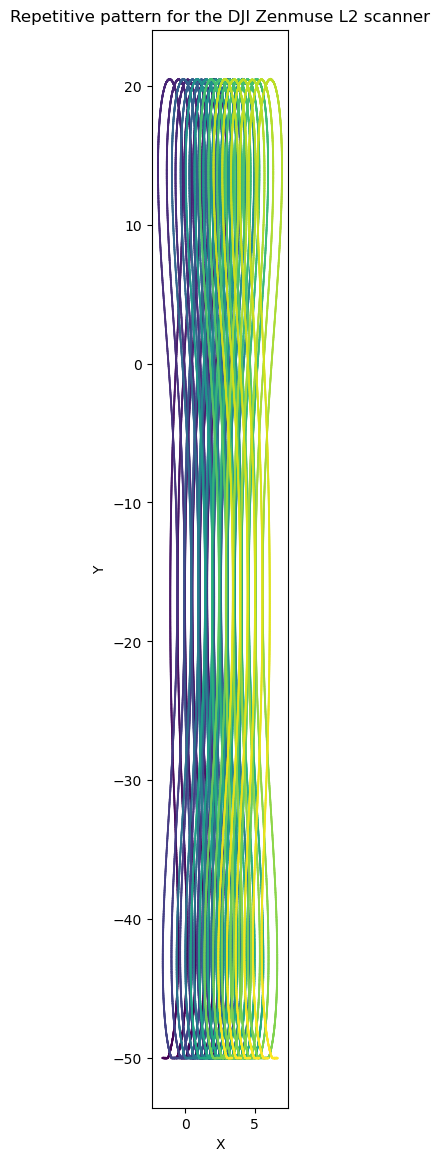

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 14))
pos = points["position"]

ax.scatter(pos[:, 0], pos[:, 1], s=0.1, c=points["gps_time"])
ax.set_ylabel("Y")
ax.set_xlabel("X")
ax.set_title("Repetitive pattern for the DJI Zenmuse L2 scanner")
ax.set_aspect("equal", "box")

plt.show()

## Survey 2: Non-repetitive scan pattern

The same scanner can be used in a second mode, which results in a non-repetitive scan pattern. The difference in the pattern is the result of different rotor frequencies for the three prisms.

In [ ]:
scanner = helios.scanner_from_name("dji_zenmuse_l2_non_repetitive")
platform = helios.platform_from_name("tripod")

survey = helios.Survey(scanner=scanner, platform=platform, scene=scene)

For the non-repetitive scan pattern, we will use a static survey and different integration times to demonstrate the characteristics of the pattern, similar to the `9-tls_livox_demo` example.

In [ ]:
# TODO: Add this example once max_duration has been merged from main

There are three `leg`s corresponding to three scan positions (SPs) at the origin O(0, 0, 0). Using the `max_duration` parameter, we can control how long the integration time (scanning time) is at each SP. With increasing integration time, we get a higher point density and the density is highest in the center of the retina-like scan pattern. 

## Executing the survey

In [ ]:
points, trajectories = survey.run(verbosity=helios.LogVerbosity.VERBOSE, format=helios.OutputFormat.NPY)

## Visualizing the results 
Now we can display the point cloud.

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 8))
points_1 = points[points["point_source_id"] == 0]
points_2 = points[points["point_source_id"] == 1]
points_3 = points[points["point_source_id"] == 2]
sp_1 = points_1["position"]
sp_2 = points_2["position"]
sp_3 = points_3["position"]

ax1.scatter(sp_1[:, 0], sp_1[:, 2], s=0.1, c=points_1["gps_time"])
ax1.set_xlabel("X")
ax1.set_ylabel("Z")
ax1.set_title("Integration time: 0.2 s")
ax1.set_aspect("equal", "box")

ax2.scatter(sp_2[:, 0], sp_2[:, 2], s=0.1, c=points_2["gps_time"])
ax2.set_xlabel("X")
ax2.set_ylabel("Z")
ax2.set_title("Integration time: 1 s")
ax2.set_aspect("equal", "box")

ax3.scatter(sp_3[:, 0], sp_3[:, 2], s=0.1, c=points_3["gps_time"])
ax3.set_xlabel("X")
ax3.set_ylabel("Z")
ax3.set_title("Integration time: 2 s")
ax3.set_aspect("equal", "box")

plt.show()